In [3]:
import matplotlib.pyplot as plt
import meshio
import numpy as np

### Load in first and last frames. 

In [71]:
# Start with first frame.
mesh = meshio.read('vtkdata/Ra000000000.vtk')
mesh

<meshio mesh object>
  Number of points: 3120
  Number of cells:
    quad: 3008
  Point data: Temperature, ux, uy

In [72]:
shape = (48, 65)
temp_start = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra000000050.vtk')
temp_end = np.reshape(mesh.point_data['Temperature'], shape)

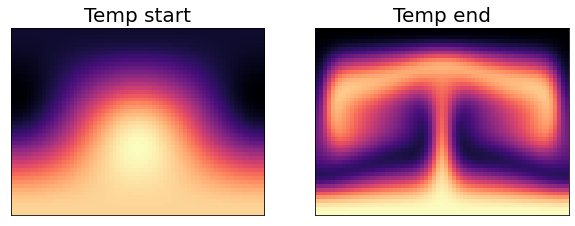

In [73]:
f, axarr = plt.subplots(ncols = 2, figsize=(10,4))
axarr[0].imshow(temp_start, origin='lower', cmap='magma')
axarr[1].imshow(temp_end, origin='lower', cmap='magma')

axarr[0].set_title('Temp start', size=20)
axarr[1].set_title('Temp end', size=20)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## Read in parallel version of start and end files

In [74]:
shape = (12, 65)

# Read in start files. 
mesh = meshio.read('vtkdata/Ra_P000_000000000.vtk')
p0_start = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P001_000000000.vtk')
p1_start = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P002_000000000.vtk')
p2_start = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P003_000000000.vtk')
p3_start = np.reshape(mesh.point_data['Temperature'], shape)

# Read in end files. 
mesh = meshio.read('vtkdata/Ra_P000_000000050.vtk')
p0_end = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P001_000000050.vtk')
p1_end = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P002_000000050.vtk')
p2_end = np.reshape(mesh.point_data['Temperature'], shape)
mesh = meshio.read('vtkdata/Ra_P003_000000050.vtk')
p3_end = np.reshape(mesh.point_data['Temperature'], shape)

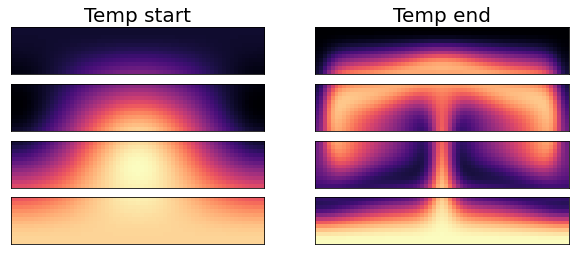

In [75]:
# Plot four subfields
f, axarr = plt.subplots(ncols=2, nrows=4, figsize=(10,4))

low = temp_start.min()
high = temp_start.max()
axarr[3,0].imshow(p0_start, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[2,0].imshow(p1_start, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[1,0].imshow(p2_start, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[0,0].imshow(p3_start, vmin=low, vmax=high, origin='lower', cmap='magma')


low = temp_end.min()
high = temp_end.max()
axarr[3,1].imshow(p0_end, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[2,1].imshow(p1_end, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[1,1].imshow(p2_end, vmin=low, vmax=high, origin='lower', cmap='magma')
axarr[0,1].imshow(p3_end, vmin=low, vmax=high, origin='lower', cmap='magma')

axarr[0,0].set_title('Temp start', size=20)
axarr[0,1].set_title('Temp end', size=20)

for ax in axarr.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

The pictures look nice! We can confirm that the data from the distributed memory version matches the original.

In [80]:
print(np.max(temp_start[:12,:] - p0_start), np.max(temp_end[:12,:] - p0_end))
print(np.max(temp_start[12:24,:] - p1_start), np.max(temp_end[12:24,:] - p1_end))
print(np.max(temp_start[24:36,:] - p2_start), np.max(temp_end[24:36,:] - p2_end))
print(np.max(temp_start[36:,:] - p3_start), np.max(temp_end[36:,:] - p3_end))

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
